# Here we determine the outcome of the harvest season, i.e. whether the crop would be Alive, damaged by pesticides or damaged by other reasons.

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [254]:
ds=pd.read_excel("train_agriculture.xlsx")
ds

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [255]:
ds.shape

(4599, 10)

Observation:
    
    There are 4599 rows and 10 columns in our dataset.

In [256]:
ds.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

Field Description:
    
    1. ID - UniqueID
    
    2. Estimated_Insects_Count - Estimated Insects Count per square meter
    
    3. Crop_Type - Category of crop (0,1)
    
    4. Soil_Type - Category of soil (0,1)
    
    5. Pesticide_Use_Category - Type of pesticides used (1-Never used, 2-Previously used, 3-Currently using)
    
    6. Number_Doses_Week - Number of doses per week
    
    7. Number_Weeks_Used - Number of weeks used
    
    8. Number_Weeks_Quit - Number of weeks quit
    
    9. Season - Season category (1,2,3)
    
    10. Crop_Damage - Crop damage category (0-Alive, 1-Damaged due to other causes, 2-Damaged due to pesticides)

In [257]:
ds.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

Observation:
    
    1. ID column is of oject data type.
    
    2. Number_Weeks_Used is of float64 data type.
    
    3. Rest other columns are of int64 data type.

In [258]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


Observation:
    
    1. The dataset consists of only 2 types of data numeric and object.
    
    2. There are 9 numeric columns of which 1 is of float64 data type and the rest others are of int64 data types.

# To check the Missing Values

In [259]:
ds.isnull().values.any()

True

Observation:
    
    There are missing values present in our dataset.

In [260]:
ds.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

Observation:
    
    1.There are 442 missing values in Number_Weeks_Used column.
    
    2.There are no missing values in rest other columns.
    
We can also see this via visualization with the help of heatmap.

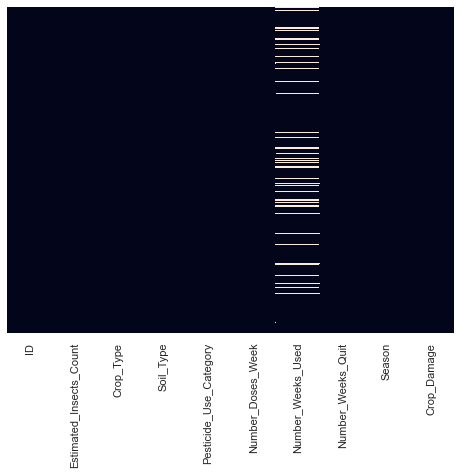

In [261]:
plt.figure(figsize=(8,6))
sns.heatmap(ds.isnull(),yticklabels=False,cbar=False)

# Exploring the categorical column

In [262]:
ds['ID'].value_counts()

F00002921    1
F00006870    1
F00003419    1
F00004925    1
F00003497    1
            ..
F00000878    1
F00007770    1
F00003824    1
F00001064    1
F00007365    1
Name: ID, Length: 4599, dtype: int64

Observation:
    
    There are all unique values present in ID column.

# Imputing missing values in numeric columns

In [263]:
#Imputing the missing values with their median

ds['Number_Weeks_Used'].fillna(ds['Number_Weeks_Used'].median(),inplace=True)

In [264]:
#Now check the null values

ds.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

Observation:
    
    All the missing values are imputed. we can also see this via visualization with the help of heatmap.

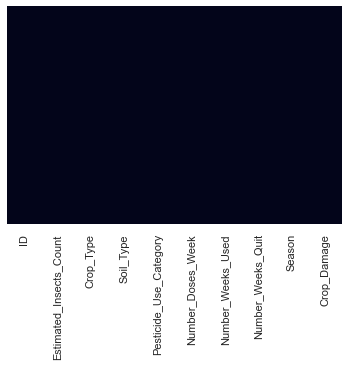

In [265]:
sns.heatmap(ds.isnull(),yticklabels=False,cbar=False)

Observation:
    
    We confirm that there are no missing values present in our dataset.

# Summary Statistics

In [266]:
ds.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.805392,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.968667,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


Observation:
    
    1. Maximum number of standard deviaiton is observed in Estimated_Insects_Count.
    
    2. In the columns Estimated_Insect_Counts, Crop_Type, Soil_Type, Number_Weeks_Quit, Crop_Damage mean is significantly greater than median so these columns are positively skewed.
    
    3. In the column Season median is greater than mean so the column is negatively skewed.
    
    4. In the columns Estimated_Insects_Count, Crop_Type, Number_Doses_Week, Number_Weeks_Used, Number_Weeks_Quit, Crop_Damage there is large differnce between 75 percentile and maximum so outliers are present here.

# To check the correlation

In [267]:
ds_cor= ds.corr()
ds_cor

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.428238,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002036,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.093690,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.367823,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.099903,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.428238,-0.002036,-0.093690,0.367823,0.099903,1.000000,-0.445483,-0.010814,0.231439
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.445483,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.010814,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.231439,-0.152918,-0.016196,1.000000


For better understanding we can see it via visualization with the help of heatmap.

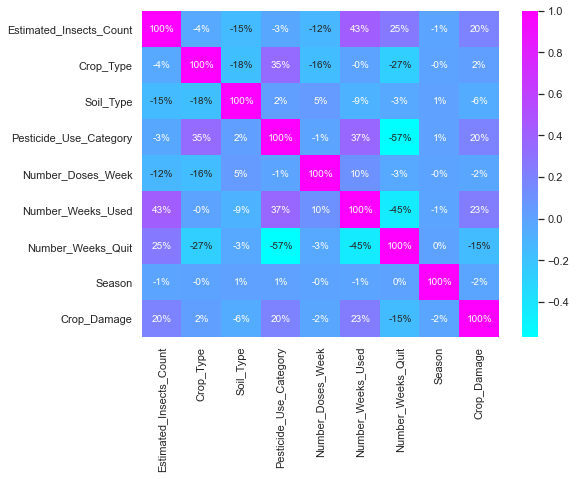

In [268]:
plt.figure(figsize=(8,6))
sns.heatmap(ds_cor,annot=True,fmt='.0%',cmap='cool')
plt.show()

Observation:
    
    1. Estimated_Insects_Count is highly positively correlated with Number_Weeks_Used column.
    
    2. Pesticide_Use_Category is highly negatively correlated with Number_Weeks_Quit column and positively correlated Nummber_Weeks_Used column.
    
    3. Crop_Type is highly positively correlated with Pesticide_Use_Category column.
    
    4. Crop_Damage is highly positively correlated with Number_Weeks_Used, Pesticide_Use_Category, Estimated_Insects_Count.

Text(0.5, 1.0, 'correaltion with target variable Crop_Damage')

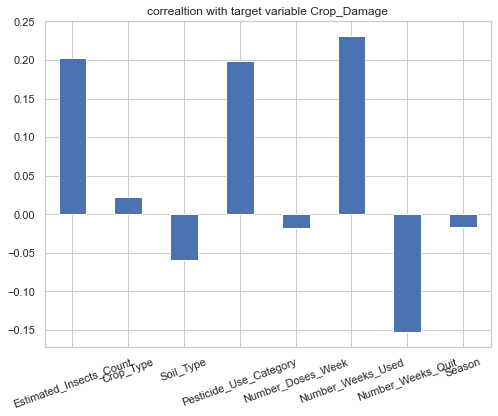

In [269]:
#checking the correlation with target variable 'Crop_Damage'

plt.figure(figsize=(8,6))
ds.drop('Crop_Damage', axis=1).corrwith(ds['Crop_Damage']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("correaltion with target variable Crop_Damage")

Observation:
    
    1. Highest positive correlation is observed in Number_Weeks_Used column with respect to 'Crop_Damage'
    
    2. Also the columns Estimated_Insects_Count, Pesticide_Use_Category are highly positively correlated with 'Crop_Damage'
    
    3. Highest negative correlation is observed in Number_Weeks_Quit column with respect to 'Crop_Damage'

# Dropping the unnecessary columns

In [270]:
ds.drop(['ID'],axis=1,inplace=True)

In [271]:
ds.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


Observation:
    
    Column ID has been dropped from our dataset.

# Data visualization

Our target variable is Crop_Damage column.

0 - Alive

1 - Damaged due to other causes

2 - Damaged due to pesticides

# Univariate Analysis

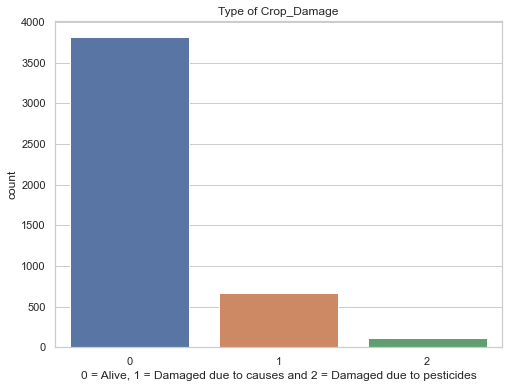

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

In [272]:
#Checking the target variable

plt.subplots(figsize=(8,6))
sns.countplot(x="Crop_Damage", data=ds)
plt.title("Type of Crop_Damage")
plt.xlabel('0 = Alive, 1 = Damaged due to causes and 2 = Damaged due to pesticides')
plt.ylabel("count")
plt.show()

ds['Crop_Damage'].value_counts()

Observation:
    
    1. 3820 number of crops in our dataset are healthy and alive.
    
    2. 664 number of crops in our dataset are damaged due to other causes.
    
    3. 115 number of crops in our dataset are damaged due to pesticides.

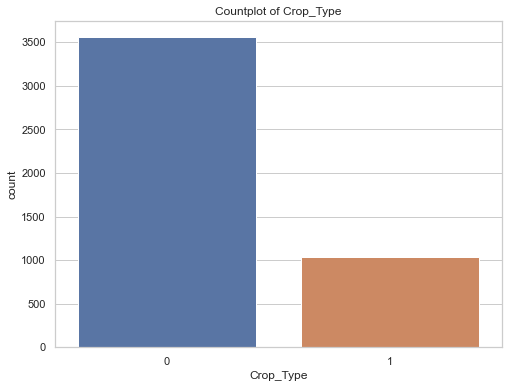

0    3565
1    1034
Name: Crop_Type, dtype: int64


In [273]:
# checking the column Crop_Type

plt.subplots(figsize=(8,6))
sns.countplot(x="Crop_Type", data=ds)
plt.title("Countplot of Crop_Type")
plt.xlabel('Crop_Type')
plt.ylabel("count")
plt.show()

print(ds.Crop_Type.value_counts())

Observation:
    
    1. There are two types of crop present in our dataset i.e 0 and 1
    
    2. 3565 number of crops are of type 0.
    
    3. 1034 number of crops are of type 1.

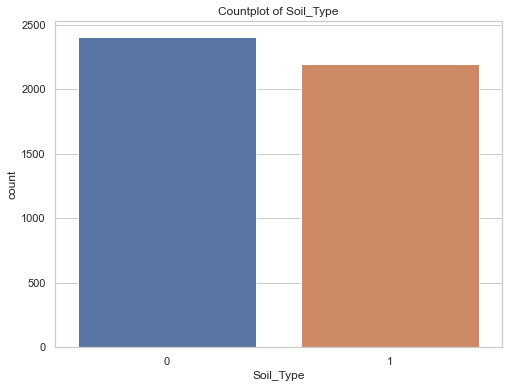

0    2407
1    2192
Name: Soil_Type, dtype: int64


In [274]:
# checking the column Soil_Type

plt.subplots(figsize=(8,6))
sns.countplot(x="Soil_Type", data=ds)
plt.title("Countplot of Soil_Type")
plt.xlabel('Soil_Type')
plt.ylabel("count")
plt.show()

print(ds.Soil_Type.value_counts())

Observation:
    
    1. There are two types of soil present in our dataset 0 and 1.
    
    2. 2407 number of soil are of type 0.
    
    3. 2192 number of soil are of type 1.

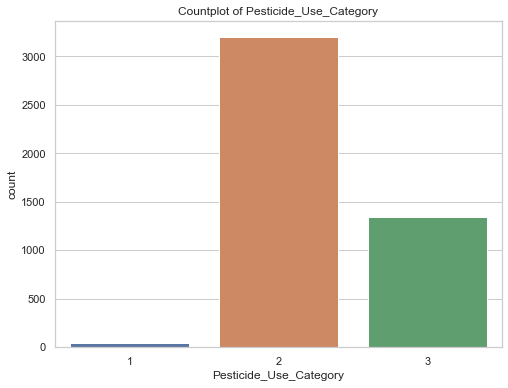

2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64


In [275]:
# checking the column Pesticide_Use_Category

plt.subplots(figsize=(8,6))
sns.countplot(x="Pesticide_Use_Category", data=ds)
plt.title("Countplot of Pesticide_Use_Category")
plt.xlabel('Pesticide_Use_Category')
plt.ylabel("count")
plt.show()

print(ds.Pesticide_Use_Category.value_counts())

Observation:
    
    1. There are three types of pesticides used in our dataset i.e type 1, 2 and 3
    
    2. 3205 number of pesticides are of type 2.
    
    3. 1349 number of pesticides are of type 3.
    
    4. 45 number of pesticides are of type 1.

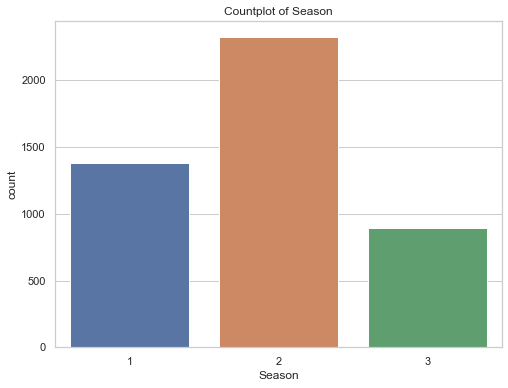

2    2327
1    1379
3     893
Name: Season, dtype: int64


In [276]:
# checking the column Season

plt.subplots(figsize=(8,6))
sns.countplot(x="Season", data=ds)
plt.title("Countplot of Season")
plt.xlabel('Season')
plt.ylabel("count")
plt.show()

print(ds.Season.value_counts())

Observation:
    
    1. There are three types of Season present in our dataset.
    
    2. 2327 number of Season are of type 2.
    
    3. 1379 number of Season are of type 1.
    
    4. 893 number of Season are of type 3.

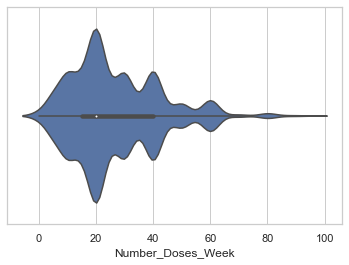

20    1211
40     657
30     584
10     537
15     393
5      268
25     263
60     237
50     172
35     101
45      53
0       45
80      36
70      17
55      11
90       5
85       4
65       3
75       1
95       1
Name: Number_Doses_Week, dtype: int64

In [277]:
#Checking the column Number_Doses_Week

sns.set(style='whitegrid')
sns.violinplot(ds['Number_Doses_Week'])
plt.show()

ds['Number_Doses_Week'].value_counts()

Observation:
    
    1. Maximum(1211) number of crops are given 20 doses per week.
    
    2. Maximum Number_Doses_Week fall in the range of 18 to 40.

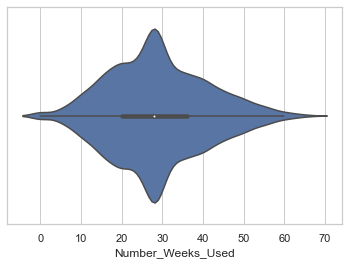

28.0    541
20.0    209
30.0    194
25.0    165
40.0    133
       ... 
62.0      5
59.0      5
65.0      3
66.0      3
64.0      1
Name: Number_Weeks_Used, Length: 63, dtype: int64

In [278]:
#Checking the column Number_Weeks_Used

sns.set(style='whitegrid')
sns.violinplot(ds['Number_Weeks_Used'])
plt.show()

ds['Number_Weeks_Used'].value_counts()

Observation:
    
    1. For Maximum(541) number of crops 28 weeks pesticides are used.
    
    2. Maximum number of weeks pesticides used fall in the range of 20 to 38.

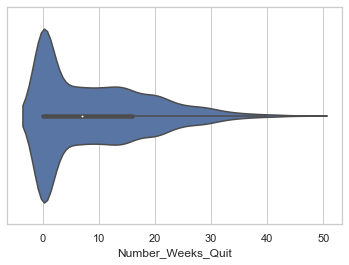

0     1496
14     146
2      145
6      140
12     137
15     136
10     134
5      134
1      133
20     131
8      125
3      124
13     123
7      122
9      118
4      117
11     116
16     105
17      94
19      87
18      83
22      83
21      74
23      54
24      52
25      48
28      46
29      41
26      41
27      37
30      34
31      25
32      21
33      16
34      16
35      11
37      11
41       9
38       9
36       8
40       4
39       3
42       3
44       2
43       2
47       2
46       1
Name: Number_Weeks_Quit, dtype: int64

In [279]:
#Checking the column Number_Weeks_Quit

sns.set(style='whitegrid')
sns.violinplot(ds['Number_Weeks_Quit'])
plt.show()

ds['Number_Weeks_Quit'].value_counts()

Observation:
    
    1. The Maximum(1496) number of Number_Weeks_Quit are 0.
    
    2. The Maximum number of Number_Weeks_Quit fall in the range of 0 to 16.

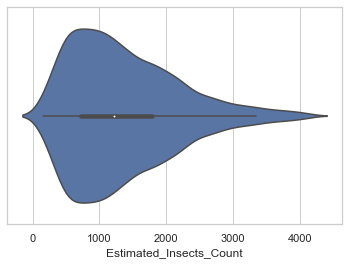

1132    193
1212    187
1385    182
1056    180
1478    177
       ... 
3515      7
151       7
169       4
231       4
4097      2
Name: Estimated_Insects_Count, Length: 71, dtype: int64

In [280]:
#Checking the column Estiamted_Insects_Count

sns.set(style='whitegrid')
sns.violinplot(ds['Estimated_Insects_Count'])
plt.show()

ds['Estimated_Insects_Count'].value_counts()

Observation:
    
    1. The Estimated_Insects_Count 193 are found in maximum(1132) number of crops.
    
    2. The maximum number of Estimated_Insects_Count fall in the range of 800 to 1800.

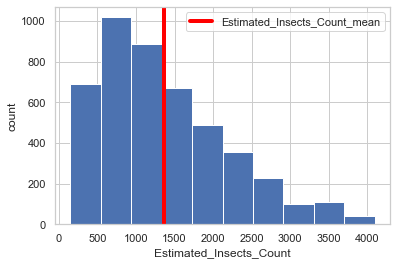

In [281]:
#checking the mean of Estimated_Insects_Count

red_shift = ds['Estimated_Insects_Count'].hist()
mean_val = np.mean(ds['Estimated_Insects_Count'])
plt.axvline(mean_val,linewidth=4, color='red', label='Estimated_Insects_Count_mean')
plt.xlabel('Estimated_Insects_Count')
plt.ylabel('count')
plt.legend()
plt.show()

Observation:
    
    The mean value of Estimated_Insects_Count is 1500.

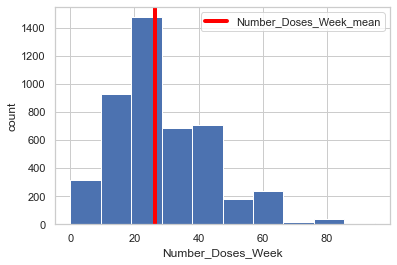

In [282]:
#checking the mean of Number_Doses_Week

red_shift = ds['Number_Doses_Week'].hist()
mean_val = np.mean(ds['Number_Doses_Week'])
plt.axvline(mean_val,linewidth=4, color='red', label='Number_Doses_Week_mean')
plt.xlabel('Number_Doses_Week')
plt.ylabel('count')
plt.legend()
plt.show()

Observation:
    
    The mean value of Number_Doses_Week is 38.

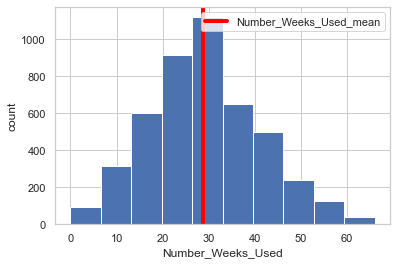

In [283]:
#checking the mean of Number_Weeks_Used

red_shift = ds['Number_Weeks_Used'].hist()
mean_val = np.mean(ds['Number_Weeks_Used'])
plt.axvline(mean_val,linewidth=4, color='red', label='Number_Weeks_Used_mean')
plt.xlabel('Number_Weeks_Used')
plt.ylabel('count')
plt.legend()
plt.show()

Observation:
    
    The mean value of pesticides being Number_Weeks_Used is 32.

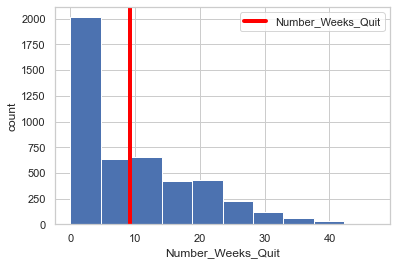

In [284]:
#checking the mean of Number_Weeks_Quit

red_shift = ds['Number_Weeks_Quit'].hist()
mean_val = np.mean(ds['Number_Weeks_Quit'])
plt.axvline(mean_val,linewidth=4, color='red', label='Number_Weeks_Quit')
plt.xlabel('Number_Weeks_Quit')
plt.ylabel('count')
plt.legend()
plt.show()

Observation:
    
    The mean value of Number_Weeks_Quit is 10.

# Bivariate Analysis

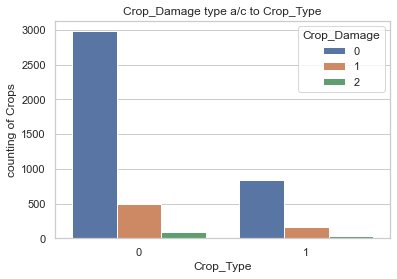

Crop_Type  Crop_Damage
0          0              2979
           1               498
           2                88
1          0               841
           1               166
           2                27
Name: Crop_Damage, dtype: int64


In [285]:
#Crop_Type vs Crop_Damage

sns.countplot(x="Crop_Type",hue='Crop_Damage',data=ds)
plt.title("Crop_Damage type a/c to Crop_Type")
plt.xlabel('Crop_Type')
plt.ylabel('counting of Crops')
plt.show()

print(ds.groupby('Crop_Type')['Crop_Damage'].value_counts())

Observation:
    
    1. 2979 crops of Crop_Type 0 are Alive, 498 are damaged due to other causes, 88 are damaged due to pesticides.
    
    2. 841 crops of Crop_Type 1 are Alive, 166 are damaged due to other causes, 27 are damaged due to pesticides.

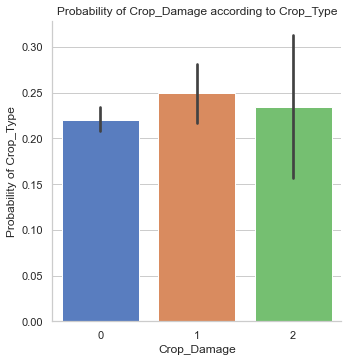

In [286]:
#Factor plot of Crop_Damage vs Crop_Type

sns.factorplot(x='Crop_Damage',y='Crop_Type',data=ds,kind='bar',size=5,palette='muted',aspect=1)
plt.title('Probability of Crop_Damage according to Crop_Type')
plt.ylabel('Probability of Crop_Type')
plt.show()

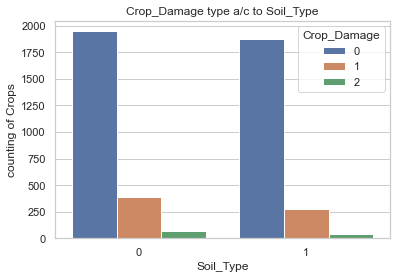

Soil_Type  Crop_Damage
0          0              1947
           1               390
           2                70
1          0              1873
           1               274
           2                45
Name: Crop_Damage, dtype: int64


In [287]:
#Soil_Type vs Crop_Damage

sns.countplot(x="Soil_Type",hue='Crop_Damage',data=ds)
plt.title("Crop_Damage type a/c to Soil_Type")
plt.xlabel('Soil_Type')
plt.ylabel('counting of Crops')
plt.show()

print(ds.groupby('Soil_Type')['Crop_Damage'].value_counts())

Observation:
    
    1. 1947 crops of Soil_Type 0 are Alive, 390 are damaged due to other causes, 70 are damaged due to pesticides.
    
    2. 1873 crops of Soil_Type 1 are Alive, 274 are damaged due to other causes, 45 are damaged due to pesticides.

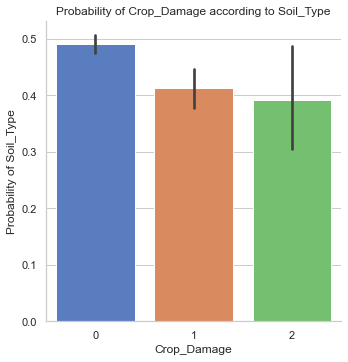

In [288]:
#Factor plot of Crop_Damage vs Soil_Type

sns.factorplot(x='Crop_Damage',y='Soil_Type',data=ds,kind='bar',size=5,palette='muted',aspect=1)
plt.title('Probability of Crop_Damage according to Soil_Type')
plt.ylabel('Probability of Soil_Type')
plt.show()

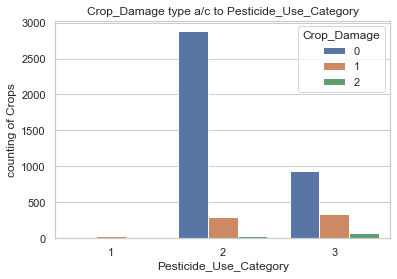

Pesticide_Use_Category  Crop_Damage
1                       1                33
                        0                 7
                        2                 5
2                       0              2881
                        1               290
                        2                34
3                       0               932
                        1               341
                        2                76
Name: Crop_Damage, dtype: int64


In [289]:
#Pesticide_Use_Category vs Crop_Damage

sns.countplot(x="Pesticide_Use_Category",hue='Crop_Damage',data=ds)
plt.title("Crop_Damage type a/c to Pesticide_Use_Category")
plt.xlabel('Pesticide_Use_Category')
plt.ylabel('counting of Crops')
plt.show()

print(ds.groupby('Pesticide_Use_Category')['Crop_Damage'].value_counts())

Observation:
    
    1. 7 crops of Pesticide_Use_Category 1 are Alive, 33 are damaged due to other causes, 5 are damaged due to pesticides.
    
    2. 2881 crops of Pesticide_Use_Category 2 are Alive, 290 are damaged due to other causes, 34 are damaged due to pesticides.
    
    3. 932 crops of Pesticide_Use_Category 3 are Alive, 341 are damaged due to other causes, 76 are damaged due to pesticides.

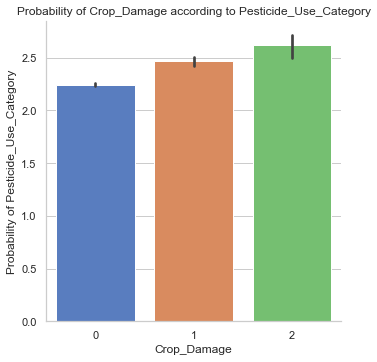

In [290]:
#Factor plot of Crop_Damage vs Pesticide_Use_Category

sns.factorplot(x='Crop_Damage',y='Pesticide_Use_Category',data=ds,kind='bar',size=5,palette='muted',aspect=1)
plt.title('Probability of Crop_Damage according to Pesticide_Use_Category')
plt.ylabel('Probability of Pesticide_Use_Category')
plt.show()

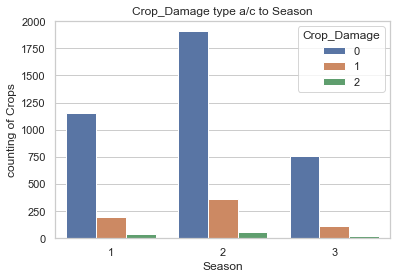

Season  Crop_Damage
1       0              1150
        1               192
        2                37
2       0              1908
        1               358
        2                61
3       0               762
        1               114
        2                17
Name: Crop_Damage, dtype: int64


In [291]:
#Season vs Crop_Damage

sns.countplot(x="Season",hue='Crop_Damage',data=ds)
plt.title("Crop_Damage type a/c to Season")
plt.xlabel('Season')
plt.ylabel('counting of Crops')
plt.show()

print(ds.groupby('Season')['Crop_Damage'].value_counts())

Observation:
    
    1. 1150 crops of Season 1 are Alive, 192 are damaged due to other causes, 37 are damaged due to pesticides.
    
    2. 1908 crops of Season 2 are Alive, 358 are damaged due to other causes, 61 are damaged due to pesticides.
    
    2. 762 crops of Season 3 are Alive, 114 are damaged due to other causes, 17 are damaged due to Pesticides.

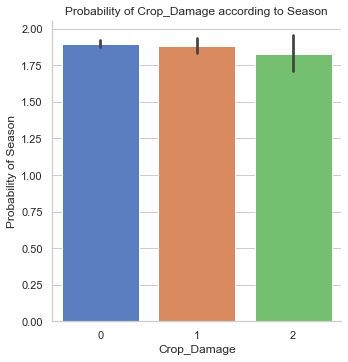

In [292]:
#Factor plot of Crop_Damage vs Season

sns.factorplot(x='Crop_Damage',y='Season',data=ds,kind='bar',size=5,palette='muted',aspect=1)
plt.title('Probability of Crop_Damage according to Season')
plt.ylabel('Probability of Season')
plt.show()

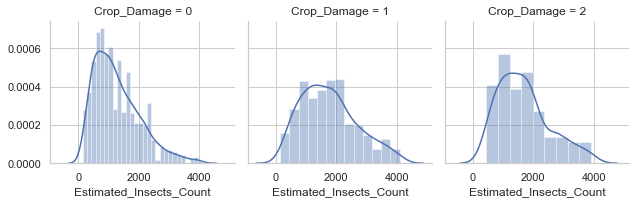

In [293]:
#Exploring Estimated_Insects_Count vs Crop_Damage via FaceGrid
facet= sns.FacetGrid(ds, col='Crop_Damage')
facet.map(sns.distplot, "Estimated_Insects_Count")
plt.show()

Observation:
    
    Estimated_Insects_Count is maximum in Crop_Damage type 1.

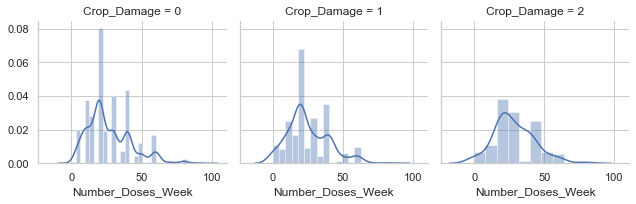

In [294]:
#Exploring Number_Doses_Week vs Crop_Damage via FaceGrid
facet= sns.FacetGrid(ds, col='Crop_Damage')
facet.map(sns.distplot, "Number_Doses_Week")
plt.show()

Observation:
    
    Number_Doses_Week is maximum in Crop_Damage type 2.

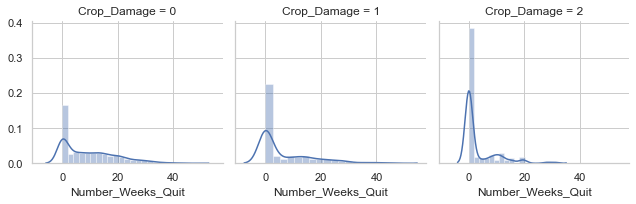

In [295]:
#Exploring Number_Weeks_Quit vs Crop_Damage via FaceGrid
facet= sns.FacetGrid(ds, col='Crop_Damage')
facet.map(sns.distplot, "Number_Weeks_Quit")
plt.show()

Observation:
    
    Number_Weeks_Quit is maximum in Crop_Damage type 0.

<Figure size 576x288 with 0 Axes>

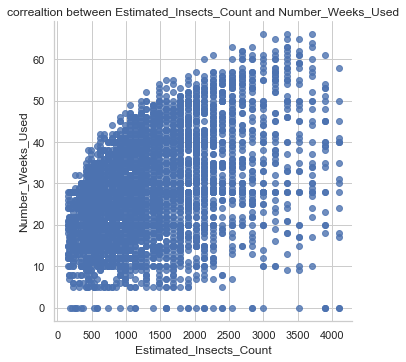

In [296]:
#scatter plot between Estimated_Insects_Count and Number_Weeks_Used
plt.figure(figsize=(8,4))
sns.lmplot(x='Estimated_Insects_Count',y='Number_Weeks_Used',fit_reg=False,data=ds)
plt.xlabel('Estimated_Insects_Count')
plt.title('correaltion between Estimated_Insects_Count and Number_Weeks_Used')
plt.ylabel('Number_Weeks_Used')
plt.show()

Observation:
    
    As the number of Estimated_Insects_Count increases number of pesticides Number_Weeks_Used also increases.

# Multivariate Analysis

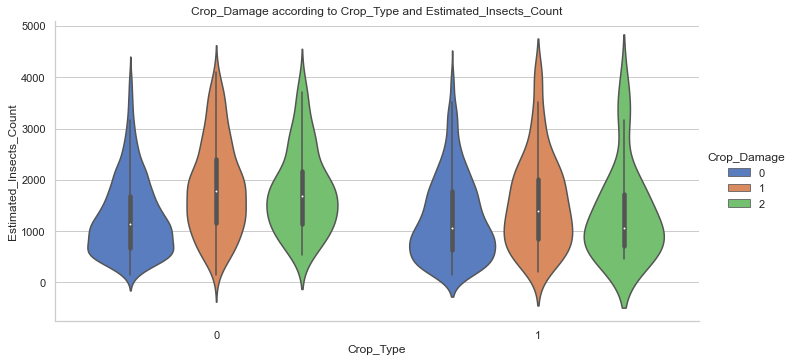

In [297]:
#checking Crop_Type and Estimated_Insects_Count with respect to Crop_Damage
sns.factorplot(x='Crop_Type',y='Estimated_Insects_Count',hue='Crop_Damage',data=ds,kind='violin',size=5,palette='muted',aspect=2)
plt.title('Crop_Damage according to Crop_Type and Estimated_Insects_Count')
plt.xticks()
plt.ylabel('Estimated_Insects_Count')
plt.show()

Observation:
    
        Estimated_Insects_Count is maximum in Crop_Damage type 1 in both the crop types.

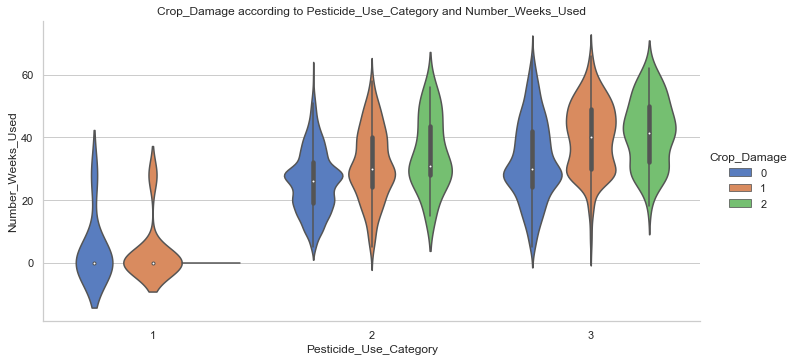

In [298]:
#checking Pesticide_Use_Category and Number_Weeks_Used with respect to Crop_Damage
sns.factorplot(x='Pesticide_Use_Category',y='Number_Weeks_Used',hue='Crop_Damage',data=ds,kind='violin',size=5,palette='muted',aspect=2)
plt.title('Crop_Damage according to Pesticide_Use_Category and Number_Weeks_Used')
plt.xticks()
plt.ylabel('Number_Weeks_Used')
plt.show()

Observation:
    
        Maximum Pesticide_Use_Category type 2 is observed in Crop_Damage type 2.

<Figure size 1008x1008 with 0 Axes>

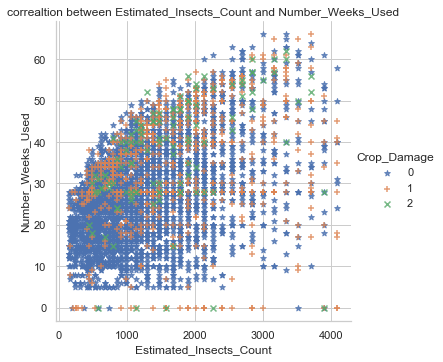

In [299]:
#scatter plot between Estimated_Insects_Count and Number_Weeks_Used with respect to Crop_Damage
plt.figure(figsize=(14,14))
sns.lmplot(x='Estimated_Insects_Count',y='Number_Weeks_Used',fit_reg=False,data=ds,hue='Crop_Damage',markers=['*','+','x'])
plt.xlabel('Estimated_Insects_Count')
plt.title('correaltion between Estimated_Insects_Count and Number_Weeks_Used')
plt.ylabel('Number_Weeks_Used')
plt.show()

Observation:
    
    1. Concentration of Crop_Damage type 0 is seen maximum.
    
    2. As the Estimated_Insects_Count increases Number_Weeks_Used increases and so the concentraion of Crop_Damage type 1 also increases.

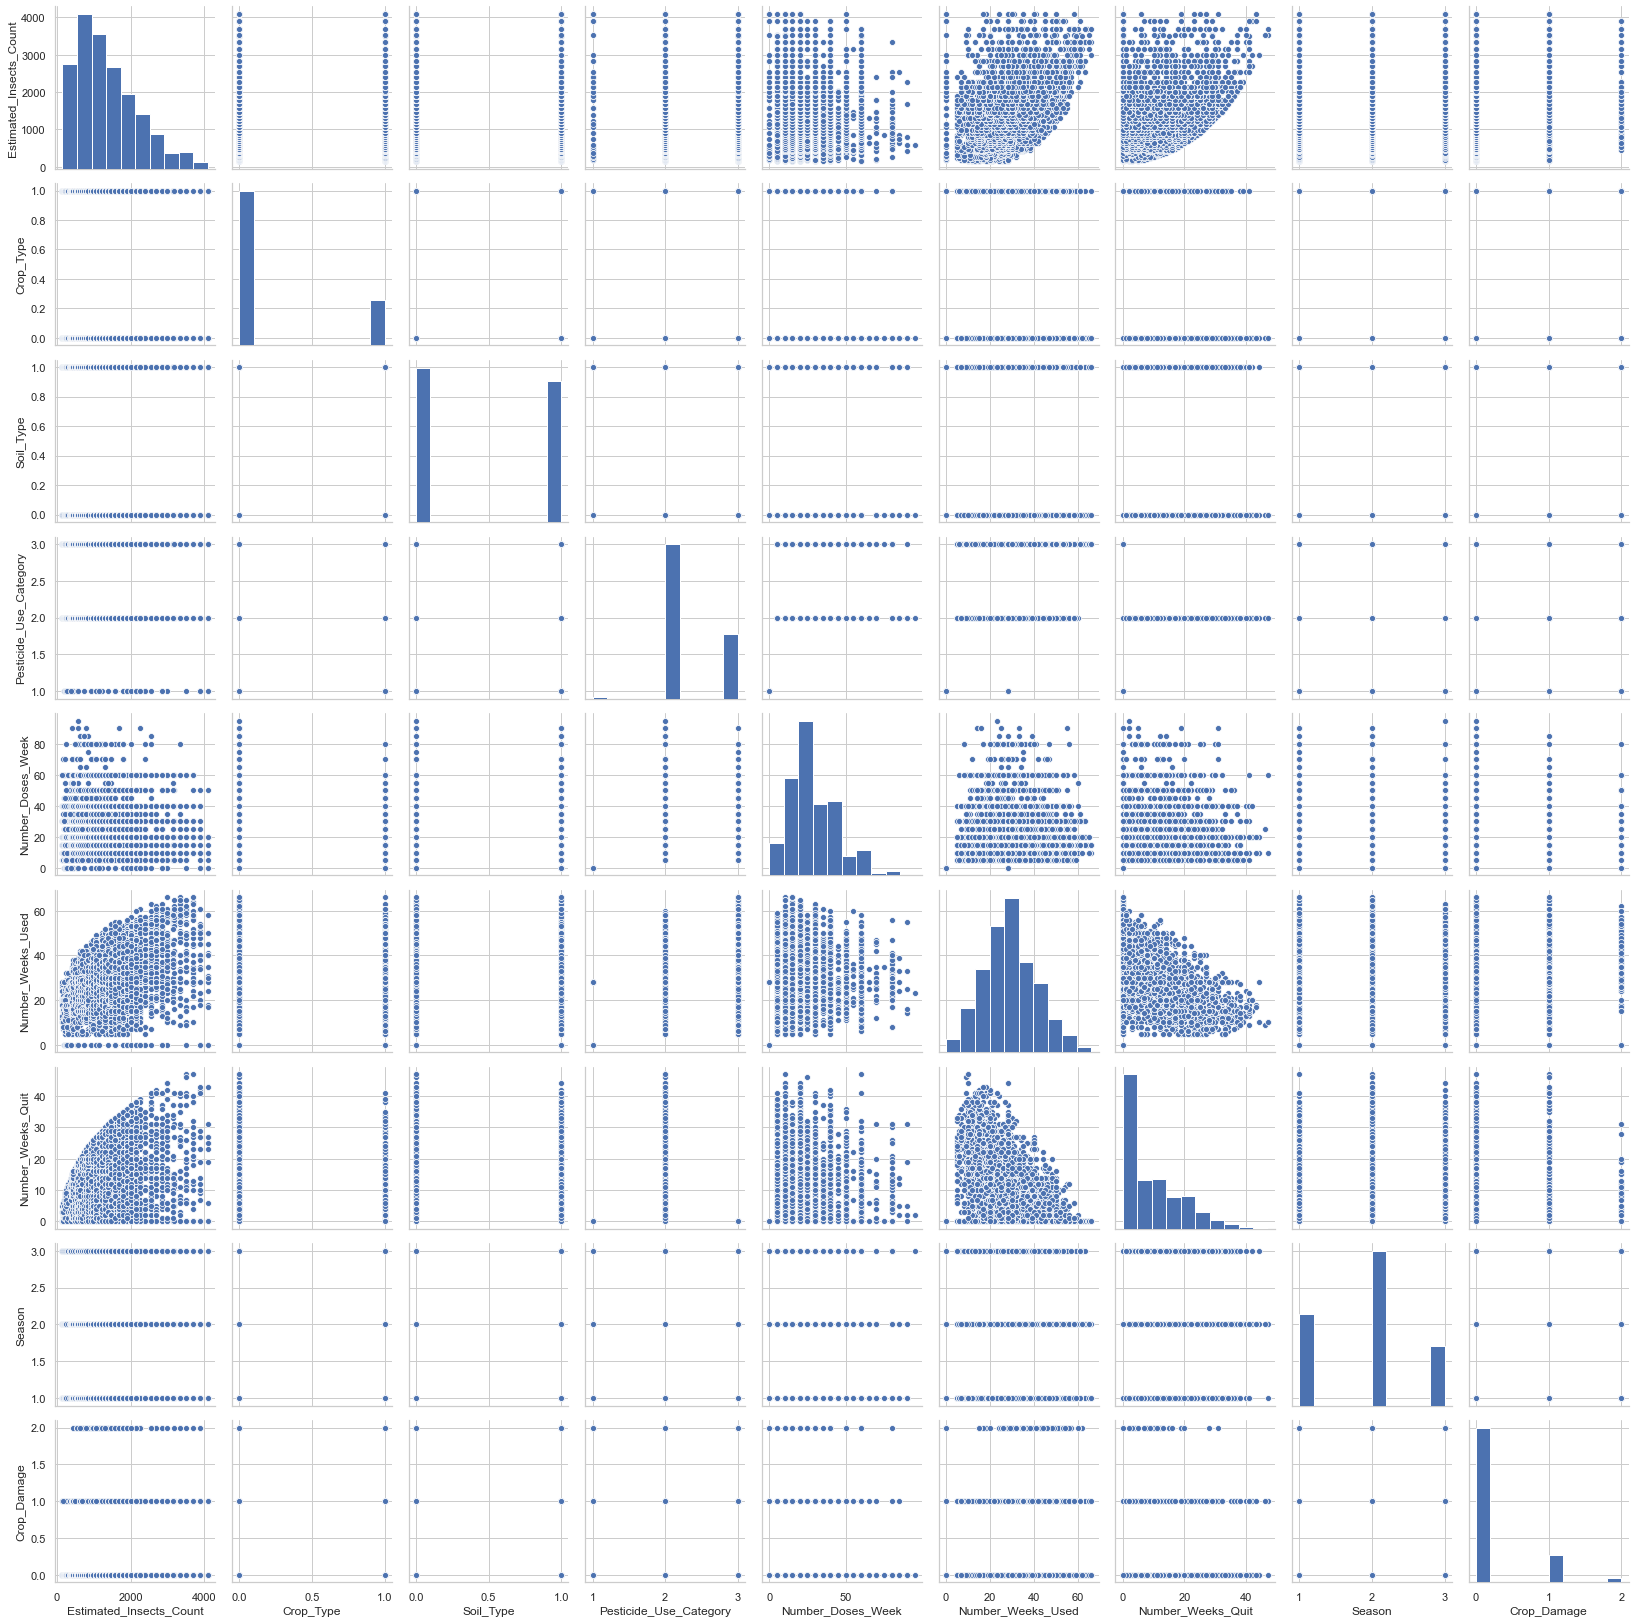

In [300]:
sns.pairplot(ds)

# Checking Skewness

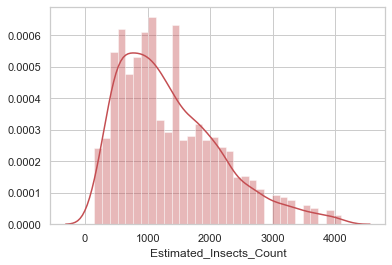

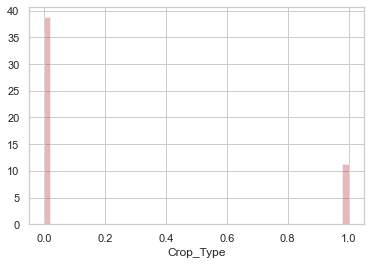

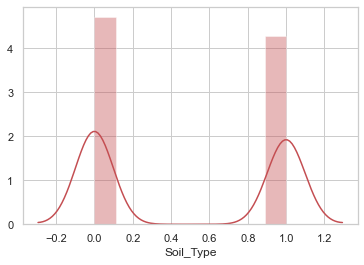

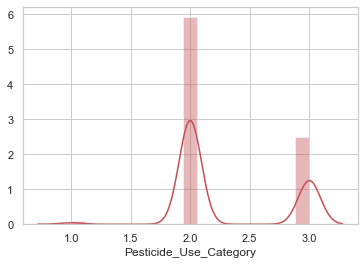

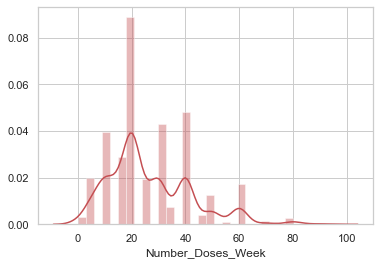

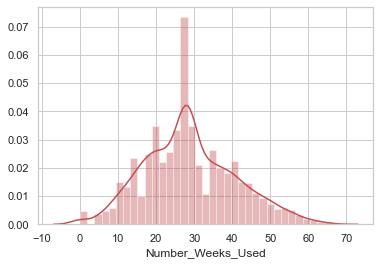

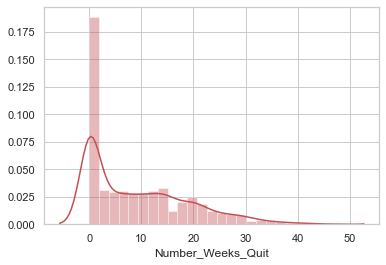

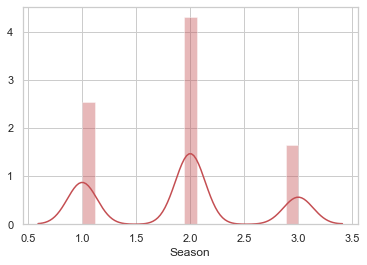

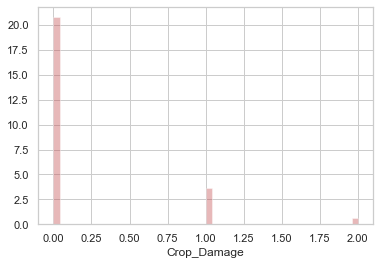

In [301]:
for col in ds.describe().columns:
    sns.distplot(ds[col],color='r')
    plt.show()

In [302]:
ds.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.299898
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

# Checking Outliers

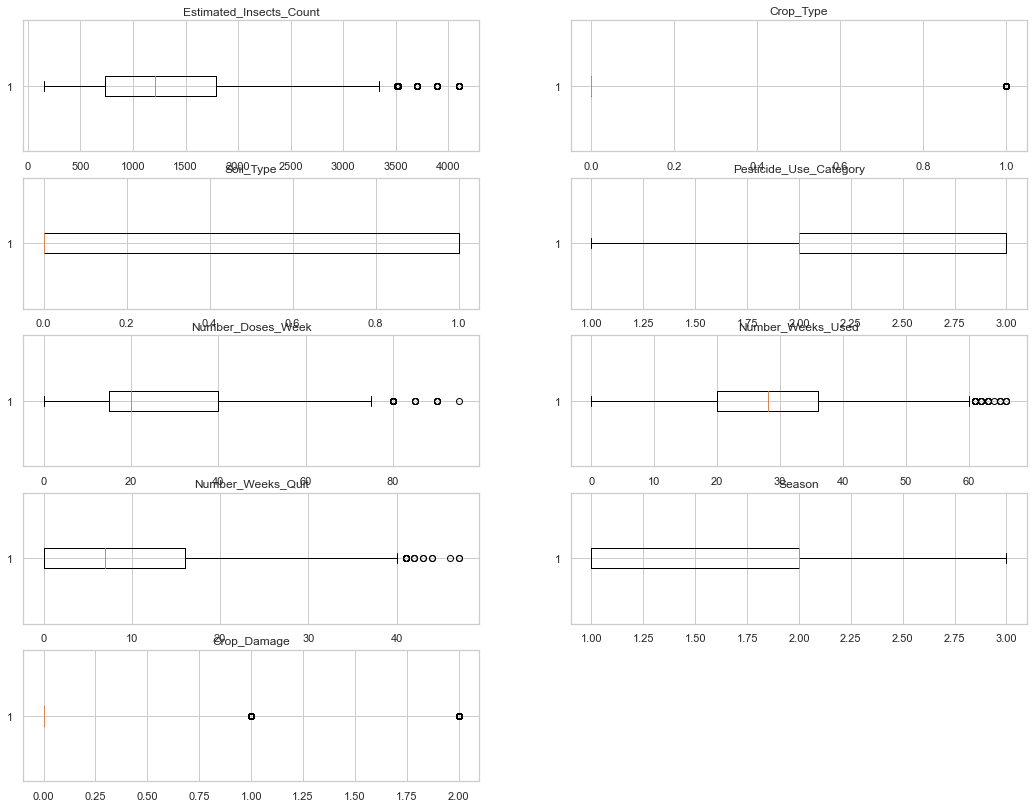

In [303]:
plt.figure(figsize=(18,14))

for i in range(len(ds.columns)):
        plt.subplot(5,2,i+1)
        plt.boxplot(ds[ds.columns[i]], vert=False)
        plt.title(ds.columns[i])
plt.show()

Observation:
    
    We can see that there are some outliers present in our dataset.

In [304]:
ds.shape

(4599, 9)

# Model Training

In [305]:
ds.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [306]:
ds_x=ds.drop(columns=['Crop_Damage'],axis=1)

In [307]:
y=ds['Crop_Damage']

In [308]:
ds_x.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.299898
Number_Weeks_Quit          0.919771
Season                     0.144841
dtype: float64

In [309]:
#Treating skewness via square root method
ds_x.skew()
for col in ds_x.skew().index:
    if col in ds_x.describe().columns:
        if ds_x[col].skew()>0.55:
            ds_x[col]=np.sqrt(ds[col])
            if ds_x[col].skew()<-0.55:
                ds_x[col]=np.cbrt(ds_x[col])

In [310]:
ds_x.skew()

Estimated_Insects_Count    0.257248
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.494443
Number_Doses_Week         -0.002742
Number_Weeks_Used          0.299898
Number_Weeks_Quit          0.054299
Season                     0.144841
dtype: float64

In [311]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(ds_x)
x=pd.DataFrame(x,columns=ds_x.columns)

In [313]:
#splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [314]:
#checking the shape

print(x_train.shape,'\t\t',x_test.shape)

(3679, 8) 		 (920, 8)


In [315]:
#checking the shape

print(y_train.shape,'\t',y_test.shape)

(3679,) 	 (920,)


In [316]:
#Importing all the model library

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Importing Boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score

In [317]:
#Checking all algorithm using for loop

model=[SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*************************************************************************************************************************************************************************')
    print('\n')

Accuracy score of SVC() is:
0.8347826086956521
[[763   1   0]
 [128   5   0]
 [ 23   0   0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       764
           1       0.83      0.04      0.07       133
           2       0.00      0.00      0.00        23

    accuracy                           0.83       920
   macro avg       0.56      0.35      0.33       920
weighted avg       0.81      0.83      0.77       920

*************************************************************************************************************************************************************************


Accuracy score of DecisionTreeClassifier() is:
0.7543478260869565
[[656  91  17]
 [ 88  36   9]
 [ 17   4   2]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       764
           1       0.27      0.27      0.27       133
           2       0.07      0.09      0.08        23

    accuracy            

In [318]:
#cross validate the models

models=[SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in models:
    score=cross_val_score(m,x,y,cv=15,scoring='accuracy')
    print("Model:",m)
    print("score:",score)
    print("Mean score:",score.mean())
    print("Standard deviation:",score.std())
    print('****************************************************************************************************************************')
    print('\n')

Model: SVC()
score: [0.60912052 0.79153094 0.83061889 0.83061889 0.83061889 0.83061889
 0.83061889 0.83061889 0.83713355 0.74183007 0.83006536 0.83006536
 0.81045752 0.83006536 0.83006536]
Mean score: 0.8062698260628901
Standard deviation: 0.0577522547334368
****************************************************************************************************************************


Model: DecisionTreeClassifier()
score: [0.50488599 0.60912052 0.79153094 0.57980456 0.74918567 0.72964169
 0.51791531 0.40065147 0.64169381 0.53594771 0.72222222 0.66339869
 0.62418301 0.76797386 0.68627451]
Mean score: 0.6349619978284474
Standard deviation: 0.10784860516535304
****************************************************************************************************************************


Model: KNeighborsClassifier()
score: [0.62540717 0.66449511 0.84364821 0.73289902 0.82736156 0.82736156
 0.7752443  0.83061889 0.7980456  0.59477124 0.79084967 0.81699346
 0.72875817 0.83986928 0.82352941]
Me

# Using GridSearchCV to find out the best parameters in SVC

In [320]:
from sklearn.model_selection import GridSearchCV

parameters={'kernel':('linear','rbf','poly','sigmoid'),'C':[1,10],'random_state':range(42,60)}
sv=SVC()

clf=GridSearchCV(sv,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 1, 'kernel': 'poly', 'random_state': 42}


In [321]:
#SVC with parameters

sv=SVC(kernel='poly',C=1,random_state=42,probability=True)
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
predsv=sv.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

0.8358695652173913
[[763   1   0]
 [127   6   0]
 [ 23   0   0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       764
           1       0.86      0.05      0.09       133
           2       0.00      0.00      0.00        23

    accuracy                           0.84       920
   macro avg       0.56      0.35      0.33       920
weighted avg       0.82      0.84      0.77       920



In [322]:
#Cross Validate SVC

score=cross_val_score(sv,x,y,cv=5,scoring='accuracy')

print(score)
print('Mean:',score.mean())
print('Std:',score.std())

[0.8423913  0.83043478 0.84130435 0.83043478 0.83133841]
Mean: 0.8351807257415906
Std: 0.005464476623646511


# SVC() gives us best score without overfitting and underfitting so we save it as our final model.

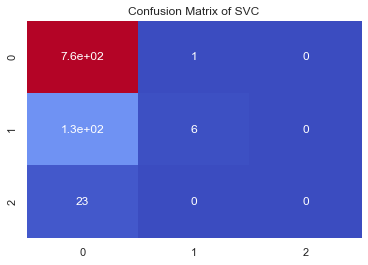

In [323]:
#plotting confusion matrix for SVC

cm=confusion_matrix(y_test,predsv)
sns.heatmap(cm,annot=True,cbar=False,cmap='coolwarm')
plt.title("Confusion Matrix of SVC")
plt.show()

In [324]:
#saving our model

import joblib
joblib.dump(sv,'sv_Agriculture.pkl')

['sv_Agriculture.pkl']

In [325]:
model=joblib.load('sv_Agriculture.pkl')

In [326]:
model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Now we test our test dataset

In [327]:
ds_test=pd.read_excel("test_agriculture.xlsx")
ds_test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


# Now make all the changes as we made on our training dataset

In [332]:
ds_test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [333]:
ds_test.drop(['ID'],axis=1,inplace=True)

In [334]:
#Imputing the missing values with their median

ds_test['Number_Weeks_Used'].fillna(ds_test['Number_Weeks_Used'].median(),inplace=True)

In [335]:
ds_test.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,28.0,0,2
1,410,1,1,1,0,0.0,0,2
2,626,1,0,1,0,0.0,0,2
3,731,1,0,1,0,0.0,0,2
4,789,0,0,1,0,0.0,0,1


In [336]:
ds_test.skew()

Estimated_Insects_Count    1.098665
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week          0.872028
Number_Weeks_Used          0.245465
Number_Weeks_Quit          1.191013
Season                     0.155872
dtype: float64

In [337]:
#Treating skewness via square root method
ds_test.skew()
for col in ds_test.skew().index:
    if col in ds_test.describe().columns:
        if ds_test[col].skew()>0.55:
            ds_test[col]=np.sqrt(ds[col])
            if ds_test[col].skew()<-0.55:
                ds_test[col]=np.cbrt(ds_test[col])

In [338]:
ds_test.skew()

Estimated_Insects_Count    0.203782
Crop_Type                  0.970701
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week         -0.209796
Number_Weeks_Used          0.245465
Number_Weeks_Quit          0.874373
Season                     0.155872
dtype: float64

In [339]:
ss=StandardScaler()
x1=ss.fit_transform(ds_test)
x1=pd.DataFrame(x1,columns=ds_test.columns)

In [341]:
#Testing our model
import sys
nums= model.predict(x1)
np.set_printoptions(threshold=sys.maxsize)
print(nums)

[1 1 1 1 0 1 0 0 1 2 1 0 1 1 1 2 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 